<a href="https://colab.research.google.com/github/youssefazazy-ai/AI-Search-Engine/blob/main/task_diamond_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import r2_score


# Load dataset

In [51]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.reset_index(inplace=True, drop=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Display basic info

In [52]:
print("Data Shape:", data.shape)
print("Data Info:")
data.info()

print("\nUnique Values in Categorical Columns:")
print("Cut:", data['cut'].unique())
print("Color:", data['color'].unique())
print("Clarity:", data['clarity'].unique())

Data Shape: (53940, 10)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB

Unique Values in Categorical Columns:
Cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# Convert 'clarity' to ordinal encoding

In [53]:

clarity_mapping = {
    "IF": 7, "VVS1": 6, "VVS2": 5, "VS1": 4,
    "VS2": 3, "SI1": 2, "SI2": 1, "I1": 0
}
data['clarity'] = data['clarity'].replace(clarity_mapping)


<ipython-input-53-6ee1655332e3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['clarity'] = data['clarity'].replace(clarity_mapping)


#  Apply one-hot encoding to categorical columns

In [54]:
data = pd.get_dummies(data, columns=['cut', 'color'], drop_first=True)

#  Define numerical and categorical features

In [55]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = [col for col in data.columns if col.startswith("cut_") or col.startswith("color_")]

#  Preprocessing pipeline

In [57]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', 'passthrough', categorical_features)
])

#  Split data into training & testing sets

In [58]:
X = data.drop('price', axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Define model evaluation function

In [59]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(x_train, y_train)
    train_score = pipeline.score(x_train, y_train)
    test_score = r2_score(y_test, pipeline.predict(x_test))
    print(f"Training R²: {train_score:.4f}, Testing R²: {test_score:.4f}")
    return pipeline

# ✅ Train and evaluate models

In [60]:
print("Linear Regression:")
linear_model = evaluate_model(LinearRegression(), x_train, y_train, x_test, y_test)

print("Lasso Regression:")
lasso_model = evaluate_model(Lasso(alpha=0.8, max_iter=10000), x_train, y_train, x_test, y_test)

print("Ridge Regression:")
ridge_model = evaluate_model(Ridge(alpha=0.9), x_train, y_train, x_test, y_test)

print("SGD Regression:")
sgd_model = evaluate_model(SGDRegressor(max_iter=2000), x_train, y_train, x_test, y_test)

Linear Regression:
Training R²: 0.8784, Testing R²: 0.8774
Lasso Regression:
Training R²: 0.8783, Testing R²: 0.8774
Ridge Regression:
Training R²: 0.8784, Testing R²: 0.8774
SGD Regression:
Training R²: 0.8773, Testing R²: 0.8769


#  Heatmap of feature correlations (ensure all numerical values)

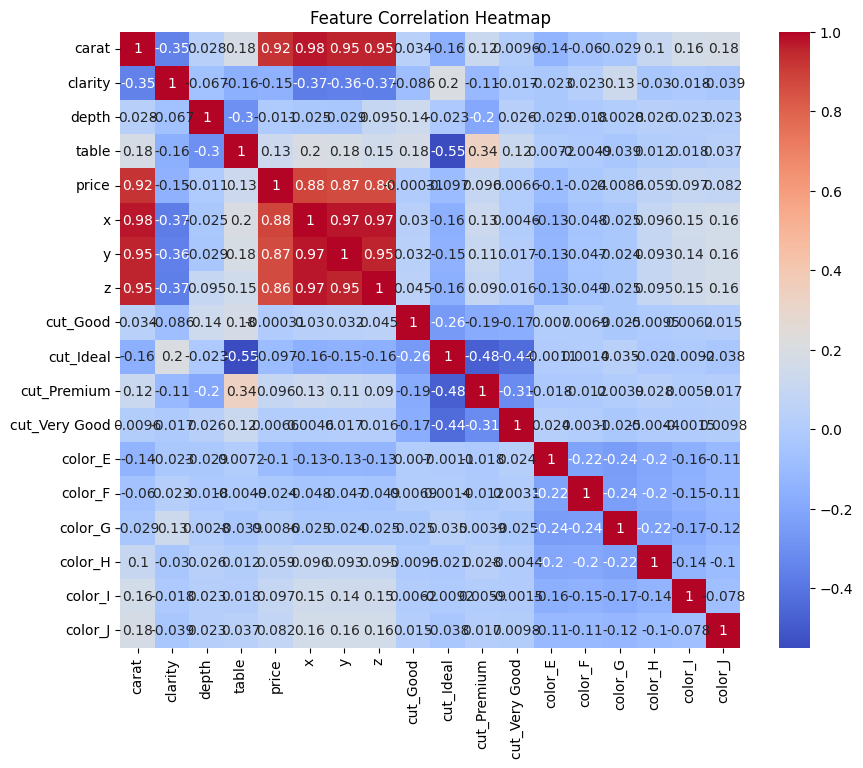

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Boxplots to visualize categorical feature impact

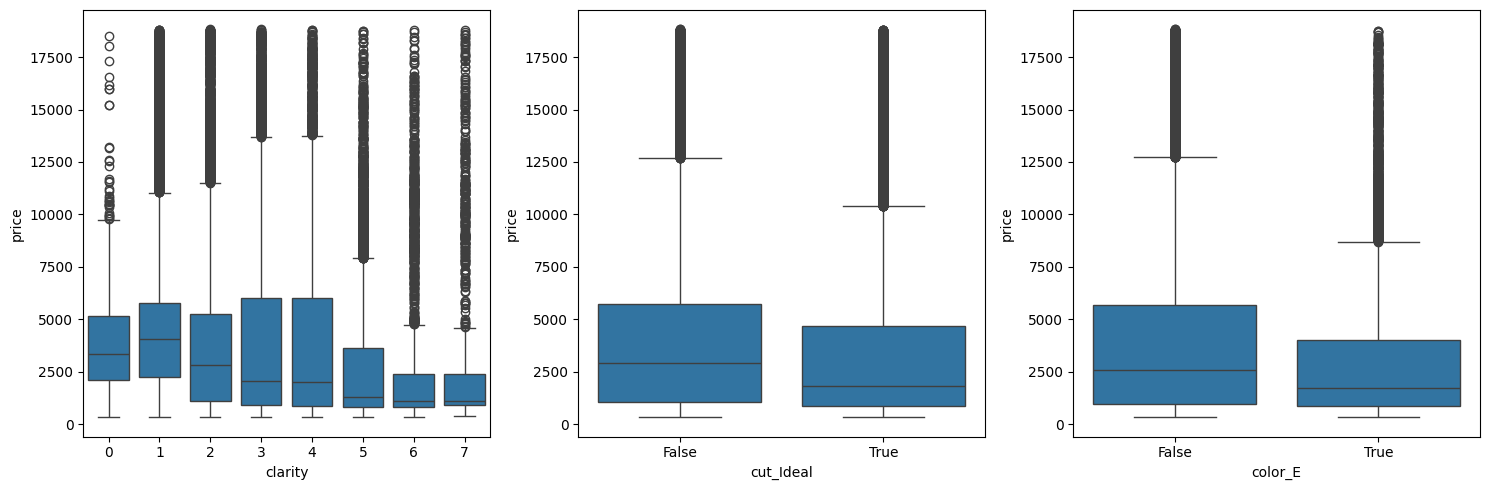

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='clarity', y='price', data=data, ax=axes[0])
sns.boxplot(x='cut_Ideal', y='price', data=data, ax=axes[1])  # Adjusted for one-hot encoding
sns.boxplot(x='color_E', y='price', data=data, ax=axes[2])  # Adjusted for one-hot encoding
plt.tight_layout()
plt.show()
